# 1. Preprocesameinto y Análisis Exploratorio de Datos

De acuerdo a la metodología planteada, para este MVP vamos a necesitar dos bases de datos:

1.- Registros de la Superintendencia de Compañías de Ecuador.  
2.- Empresas de Ecuador que han obtenido una certificación con el "Aquaculture Stewarship Council" (ASC).

## 1.1 Registros de la Superintendencia de Compañías de Ecuador

In [1]:
# Importa librerías del proyecto

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Los datos de la Superintendencia de Compañias de Ecuador fueron descargados de la página: https://appscvsmovil.supercias.gob.ec/ranking/reporte.html. Los datos corresponden a los registros del año 2023. 

En cuanto a los datos de las empresas del ASC, los mismos se obtuvieron de su página web: https://asc-aqua.org/

In [2]:
# Carga los datos del proyecto

ciuu = pd.read_csv("Datos/bi_ciiu.csv")
compania = pd.read_csv("Datos/bi_compania.csv") 
ranking = pd.read_csv("Datos/bi_ranking.csv", low_memory=False) 
segmento = pd.read_csv("Datos/bi_segmento.csv")
companias_certificadas_asc = pd.read_excel('Datos/companias_asc.xlsx')
#companias_certificadas_asc = pd.read_csv("Datos/companias_asc.csv")

In [3]:
ciuu.head(5)

,ciiu,descripcion
0,A,"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA."
1,A01,"AGRICULTURA, GANADERÍA, CAZA Y ACTIVIDADES DE ..."
2,A011,CULTIVO DE PLANTAS NO PERENNES.
3,A0111,"CULTIVO DE CEREALES (EXCEPTO ARROZ), LEGUMBRES..."
4,A0111.1,CULTIVO DE CEREALES.


In [4]:
compania.head(15)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN
5,9,1790050513001,AEROSOL DEL ECUADOR SA,ANÓNIMA ...,17,PICHINCHA ...,NaN
6,10,1700000000020,AEROVIAS ECUATORIANAS C LTDA AREA,RESPONSABILIDAD LIMITADA ...,17,PICHINCHA ...,NaN
7,11,1790044149001,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,SUCURSAL EXTRANJERA ...,17,PICHINCHA ...,NaN
8,13,0891706928001,AGENCIA COMERCIAL AZUAYA SA ACASA,ANÓNIMA ...,1,AZUAY ...,NaN
9,14,1700000000023,AGENCIA GENERAL DE SUMINISTROS SA AGDES,ANÓNIMA ...,17,PICHINCHA ...,NaN


In [5]:
compania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286869 entries, 0 to 286868
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   expediente  286869 non-null  int64 
 1   ruc         286869 non-null  object
 2   nombre      286869 non-null  object
 3   tipo        286869 non-null  object
 4   pro_codigo  286869 non-null  object
 5   provincia   286869 non-null  object
 6   Unnamed: 6  6 non-null       object
dtypes: int64(1), object(6)
memory usage: 15.3+ MB


In [6]:
compania.shape

(286869, 7)

In [7]:
ranking.head(5)

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
0,2008,1,25463.0,0,16.0,0.000000e+00,1.386558e+05,63242.19,0.00,18563.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,2,26.0,0,33.0,2.808959e+08,2.225880e+08,80289210.56,17629196.77,4980263.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,3,784.0,0,50.0,1.564886e+07,1.368537e+07,5597302.36,912111.72,269188.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,6,16538.0,0,67.0,0.000000e+00,6.248392e+05,-73907.76,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,11,410.0,0,89.0,4.968394e+07,2.397747e+06,-1122362.23,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464271 entries, 0 to 1464270
Data columns (total 54 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   anio                       1464271 non-null  int64  
 1   expediente                 1464271 non-null  int64  
 2   posicion_general           1027846 non-null  float64
 3   cia_imvalores              1464271 non-null  int64  
 4   id_estado_financiero       1027846 non-null  float64
 5   ingresos_ventas            1464271 non-null  float64
 6   activos                    1464271 non-null  float64
 7   patrimonio                 1464271 non-null  float64
 8   utilidad_an_imp            1464271 non-null  float64
 9   impuesto_renta             1464271 non-null  float64
 10  n_empleados                1464271 non-null  float64
 11  ingresos_totales           1181781 non-null  float64
 12  utilidad_ejercicio         1181781 non-null  float64
 13  utilidad_net

In [9]:
ranking["anio"].unique()

array([2008, 2022, 2009, 2021, 2020, 2019, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2023])

In [10]:
ranking.shape

(1464271, 54)

In [11]:
ranking.columns.values.tolist()

['anio',
 'expediente',
 'posicion_general',
 'cia_imvalores',
 'id_estado_financiero',
 'ingresos_ventas',
 'activos',
 'patrimonio',
 'utilidad_an_imp',
 'impuesto_renta',
 'n_empleados',
 'ingresos_totales',
 'utilidad_ejercicio',
 'utilidad_neta',
 'cod_segmento',
 'ciiu_n1',
 'ciiu_n6',
 'liquidez_corriente',
 'prueba_acida',
 'end_activo',
 'end_patrimonial',
 'end_activo_fijo',
 'end_corto_plazo',
 'end_largo_plazo',
 'cobertura_interes',
 'apalancamiento',
 'apalancamiento_financiero',
 'end_patrimonial_ct',
 'end_patrimonial_nct',
 'apalancamiento_c_l_plazo',
 'rot_cartera',
 'rot_activo_fijo',
 'rot_ventas',
 'per_med_cobranza',
 'per_med_pago',
 'impac_gasto_a_v',
 'impac_carga_finan',
 'rent_neta_activo',
 'margen_bruto',
 'margen_operacional',
 'rent_neta_ventas',
 'rent_ope_patrimonio',
 'rent_ope_activo',
 'roe',
 'roa',
 'fortaleza_patrimonial',
 'gastos_financieros',
 'gastos_admin_ventas',
 'depreciaciones',
 'amortizaciones',
 'costos_ventas_prod',
 'deuda_total',
 '

In [12]:
segmento.head(5)

,id_segmento,segmento
0,1,MICROEMPRESA
1,2,PEQUEÑA
2,3,MEDIANA
3,4,GRANDE
4,0,NO DEFINIDO


In [13]:
segmento.shape

(5, 2)

In [14]:
companias_certificadas_asc['ruc'] = companias_certificadas_asc['ruc'].astype(str)

In [15]:
companias_certificadas_asc.head(5)

,ruc,nombre_compania,certificada
0,990900418001,AQUACULTURA PUROCONGO S.A.,1
1,1390150233001,DIVACCI S.A.,1
2,990976139001,MASI S.A.,1
3,992766107001,JELEBRAT S.A.,1
4,1391791488001,GRUPO DEGFER CIA. LTDA.,1


In [16]:
companias_certificadas_asc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ruc              29 non-null     object
 1   nombre_compania  29 non-null     object
 2   certificada      29 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes


In [17]:
# Agrega ceros a los datos de ruc

companias_certificadas_asc['ruc'] = companias_certificadas_asc['ruc'].apply(lambda x: '0' + x if x[0] != '1' else x)
companias_certificadas_asc.head(5)

,ruc,nombre_compania,certificada
0,0990900418001,AQUACULTURA PUROCONGO S.A.,1
1,1390150233001,DIVACCI S.A.,1
2,0990976139001,MASI S.A.,1
3,0992766107001,JELEBRAT S.A.,1
4,1391791488001,GRUPO DEGFER CIA. LTDA.,1


In [18]:
companias_certificadas_asc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ruc              29 non-null     object
 1   nombre_compania  29 non-null     object
 2   certificada      29 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes


Necesitamos una base de datos consolidada. Por lo tanto, vamos a realizar dos operaciones "join": 

1) Entre la base de datos "compania" y "companias_certificadas_asc" basado en en el número de RUC.  <br> 
2) Entre la base de datos "ranking" y "compania" basado en el número de expediente.

En base un primer "join" se aprecia que solo existen dos empresas en la base de datos "companias" que coinciden por núnero de ruc (verificado por el SRI) con los datos del ASC.

En ese sentido, no nos conviene el "left join", sino un "outer join" que una todos los datos. Posteriromente, podemos eliminar los duplciados. 

In [19]:
# Join no. 1

datos_companias_join_1 = pd.merge(compania,companias_certificadas_asc, on = "ruc", how='outer')
datos_companias_join_1.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN,NaN,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN


In [20]:
datos_companias_join_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286869 entries, 0 to 286868
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   expediente       286869 non-null  int64  
 1   ruc              286869 non-null  object 
 2   nombre           286869 non-null  object 
 3   tipo             286869 non-null  object 
 4   pro_codigo       286869 non-null  object 
 5   provincia        286869 non-null  object 
 6   Unnamed: 6       6 non-null       object 
 7   nombre_compania  29 non-null      object 
 8   certificada      29 non-null      float64
dtypes: float64(1), int64(1), object(7)
memory usage: 21.9+ MB


In [21]:
ruc = companias_certificadas_asc['ruc']
filtro_por_ruc_base_companias = datos_companias_join_1[datos_companias_join_1['ruc'].isin(ruc)]
filtro_por_ruc_base_companias

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada
4098,2151,0990033110001,SOCIEDAD NACIONAL DE GALAPAGOS CA,ANÓNIMA ...,9,GUAYAS ...,NaN,SOCIEDAD NACIONAL DE GALAPAGOS C.A.,1.0
7160,5274,0990171092001,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,1.0
16095,19679,0990553963001,PROMARISCO SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PROMARISCO S.A.,1.0
16126,19709,0990555575001,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,ANÓNIMA ...,9,GUAYAS ...,NaN,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,1.0
16519,19119,0990488401001,CAMARONES ROLESA SA,ANÓNIMA ...,9,GUAYAS ...,NaN,CAMARONES ROLESA SA,1.0
19744,22576,0991257721001,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,ANÓNIMA ...,9,GUAYAS ...,NaN,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,1.0
21546,19880,0990576459001,PRODUMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PRODUMAR S.A.,1.0
24969,23903,0790050487001,PESQUERA E INDUSTRIAL BRAVITO S.A,ANÓNIMA ...,7,EL ORO ...,NaN,PESQUERA E INDUSTRIAL BRAVITO S A,1.0
29257,34512,1390150233001,DIVACCI S.A.,ANÓNIMA ...,13,MANABI ...,NaN,DIVACCI S.A.,1.0
36855,41042,0990666253001,EXPORTADORA LANGOSMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,EXPORTADORA LANGOSMAR S.A.,1.0


In [22]:
filtro_por_ruc_base_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 4098 to 217158
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   expediente       29 non-null     int64  
 1   ruc              29 non-null     object 
 2   nombre           29 non-null     object 
 3   tipo             29 non-null     object 
 4   pro_codigo       29 non-null     object 
 5   provincia        29 non-null     object 
 6   Unnamed: 6       0 non-null      object 
 7   nombre_compania  29 non-null     object 
 8   certificada      29 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ KB


Para esta modelación, se filtrarán los datos de las empresas de acuerdo a su código CIIU. En ese sentido, este MVP de "Blue Loan AI" utilizará solo los datos de empresas vinculadas a la acuicultura (CIIU: A032) puesto que solo contamos con datos objetivo ("target") de estos sectores (de empresas certificadas por la ASC). 

In [23]:
# Filtra los datos de la SuperCias para acuicultura

ranking["ciiu_n6"] = ranking['ciiu_n6'].fillna('')
ranking_ciiu_A032 = ranking[ranking['ciiu_n6'].str.contains('A032')]

ranking_ciiu_A032.head(5)

,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
1202,2022,22576,3.0,0,2118572.0,1.412874e+09,1.274285e+09,7.549777e+08,1.301194e+08,7555992.54,...,0.09,0.14,12195114.92,3.244702e+08,3336243.20,0.0,9.803852e+08,1.092807e+08,3052743.55,3.451556e+08
1210,2022,40424,11.0,0,2163074.0,8.814401e+08,4.892768e+08,2.303004e+08,7.612128e+07,7047425.16,...,0.14,0.07,7783463.69,5.520314e+07,414516.96,0.0,7.293640e+08,8.809702e+07,0.00,6.319420e+07
1243,2022,20090,44.0,1,2162645.0,1.625736e+08,4.842615e+08,1.174399e+08,2.844883e+06,947801.86,...,0.00,0.76,11286870.93,1.152243e+07,63909.46,0.0,1.385312e+08,1.418868e+08,49260761.45,2.280930e+07
1263,2022,703439,64.0,0,2163265.0,2.638757e+08,2.549503e+08,8.218674e+07,2.269180e+07,707853.11,...,0.08,0.26,8298086.61,1.867946e+07,1194625.85,0.0,2.104188e+08,3.000000e+07,0.00,2.697755e+07
1288,2022,44102,89.0,0,2178145.0,2.090268e+08,2.102912e+08,9.261121e+07,3.349346e+07,2920642.04,...,0.12,0.16,3042514.87,6.104162e+07,67365.98,0.0,1.083984e+08,1.719313e+07,0.00,6.408413e+07


In [24]:
ranking_ciiu_A032["ciiu_n6"]

1202       A0321.02
1210       A0321.02
1243       A0321.02
1263       A0321.01
1288       A0321.02
             ...   
1463759    A0321.02
1463841    A0321.02
1463950    A0321.02
1464191    A0321.01
1464267    A0321.01
Name: ciiu_n6, Length: 18627, dtype: object

In [25]:
ranking_ciiu_A032.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18627 entries, 1202 to 1464267
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   anio                       18627 non-null  int64  
 1   expediente                 18627 non-null  int64  
 2   posicion_general           14411 non-null  float64
 3   cia_imvalores              18627 non-null  int64  
 4   id_estado_financiero       14411 non-null  float64
 5   ingresos_ventas            18627 non-null  float64
 6   activos                    18627 non-null  float64
 7   patrimonio                 18627 non-null  float64
 8   utilidad_an_imp            18627 non-null  float64
 9   impuesto_renta             18627 non-null  float64
 10  n_empleados                18627 non-null  float64
 11  ingresos_totales           16603 non-null  float64
 12  utilidad_ejercicio         16603 non-null  float64
 13  utilidad_neta              16603 non-null

In [26]:
 # Join no. 2
    
datos_companias = pd.merge(datos_companias_join_1, ranking_ciiu_A032, on = "expediente", how='outer')
datos_companias = datos_companias.drop_duplicates(subset=['ruc'])
datos_companias.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada,anio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
0,1,1790013731001,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,ANÓNIMA ...,23,SANTO DOMINGO DE LOS TSACHILAS ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1790004724001,ACERIA DEL ECUADOR CA ADELCA.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1790008959001,ACERO COMERCIAL ECUATORIANO S.A.,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1700000000005,ACROPOLIS SA NEGOCIOS,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1790006476001,AERO TAXIS ECUATORIANOS SA ATESA,ANÓNIMA ...,17,PICHINCHA ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286646 entries, 0 to 302074
Data columns (total 62 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   expediente                 286646 non-null  int64  
 1   ruc                        286645 non-null  object 
 2   nombre                     286645 non-null  object 
 3   tipo                       286645 non-null  object 
 4   pro_codigo                 286645 non-null  object 
 5   provincia                  286645 non-null  object 
 6   Unnamed: 6                 6 non-null       object 
 7   nombre_compania            29 non-null      object 
 8   certificada                29 non-null      float64
 9   anio                       3270 non-null    float64
 10  posicion_general           1932 non-null    float64
 11  cia_imvalores              3270 non-null    float64
 12  id_estado_financiero       1932 non-null    float64
 13  ingresos_ventas            32

In [28]:
filtro_por_ruc_base_companias = datos_companias[datos_companias['ruc'].isin(ruc)]
filtro_por_ruc_base_companias.head(5)

,expediente,ruc,nombre,tipo,pro_codigo,provincia,Unnamed: 6,nombre_compania,certificada,anio,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
4119,2151,0990033110001,SOCIEDAD NACIONAL DE GALAPAGOS CA,ANÓNIMA ...,9,GUAYAS ...,NaN,SOCIEDAD NACIONAL DE GALAPAGOS C.A.,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7294,5274,0990171092001,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,ANÓNIMA ...,9,GUAYAS ...,NaN,GRAN COLOMBIANA DEL MAR GRANCOMAR SA,1.0,2022.0,...,0.10,0.00,71392.94,332841.82,0.00,0.0,1.659848e+07,0.00,0.00,478220.48
16556,19679,0990553963001,PROMARISCO SA,ANÓNIMA ...,9,GUAYAS ...,NaN,PROMARISCO S.A.,1.0,2022.0,...,0.01,0.76,6370771.29,19733700.06,2436690.14,0.0,1.824988e+08,19934339.84,16348871.22,50783905.74
16616,19709,0990555575001,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,ANÓNIMA ...,9,GUAYAS ...,NaN,ECUACULTIVOS ECUATORIANA DE CULTIVOS SA,1.0,2022.0,...,0.17,0.03,0.00,428852.53,892.44,0.0,1.002861e+07,0.00,0.00,428852.53
17089,19119,0990488401001,CAMARONES ROLESA SA,ANÓNIMA ...,9,GUAYAS ...,NaN,CAMARONES ROLESA SA,1.0,2022.0,...,0.04,0.32,0.00,0.00,0.00,0.0,0.000000e+00,0.00,0.00,0.00


In [29]:
filtro_por_ruc_base_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 4119 to 231497
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   expediente                 29 non-null     int64  
 1   ruc                        29 non-null     object 
 2   nombre                     29 non-null     object 
 3   tipo                       29 non-null     object 
 4   pro_codigo                 29 non-null     object 
 5   provincia                  29 non-null     object 
 6   Unnamed: 6                 0 non-null      object 
 7   nombre_compania            29 non-null     object 
 8   certificada                29 non-null     float64
 9   anio                       26 non-null     float64
 10  posicion_general           26 non-null     float64
 11  cia_imvalores              26 non-null     float64
 12  id_estado_financiero       26 non-null     float64
 13  ingresos_ventas            26 non-null     fl

Se eliminarán las columnas que no son necesarias para la modelación, incluyendo las columas que tienen 50% de datos ausentes (aproximadamente).

In [30]:
# Elimina columnas que no son necesarias para la modelación

datos_companias = datos_companias.drop(["anio", 
                                            "posicion_general",
                                           "id_estado_financiero",
                                            "ciiu_n1",
                                            "ciiu_n6"
                                           ], axis=1)
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286646 entries, 0 to 302074
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   expediente                 286646 non-null  int64  
 1   ruc                        286645 non-null  object 
 2   nombre                     286645 non-null  object 
 3   tipo                       286645 non-null  object 
 4   pro_codigo                 286645 non-null  object 
 5   provincia                  286645 non-null  object 
 6   Unnamed: 6                 6 non-null       object 
 7   nombre_compania            29 non-null      object 
 8   certificada                29 non-null      float64
 9   cia_imvalores              3270 non-null    float64
 10  ingresos_ventas            3270 non-null    float64
 11  activos                    3270 non-null    float64
 12  patrimonio                 3270 non-null    float64
 13  utilidad_an_imp            32

In [31]:
datos_companias.describe()

,expediente,certificada,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,286646.000000,29.0,3270.000000,3.270000e+03,3.270000e+03,3.270000e+03,3.270000e+03,3.270000e+03,3270.000000,1.610000e+03,...,1278.000000,1278.000000,1.277000e+03,1.277000e+03,1.277000e+03,1277.000000,1.277000e+03,1.277000e+03,1.277000e+03,1.277000e+03
mean,252322.449460,1.0,0.000612,2.262171e+06,2.056692e+06,8.365483e+05,2.311776e+11,8.392558e+04,25.018349,4.547930e+06,...,0.375368,0.563779,8.336569e+04,6.315678e+05,1.217792e+04,491.106226,4.539182e+06,5.242489e+05,6.342582e+04,7.540836e+05
std,240485.890015,0.0,0.024727,3.155126e+07,2.686065e+07,1.450075e+07,1.321963e+13,2.537267e+06,320.393663,4.508418e+07,...,3.133512,2.517835,6.392593e+05,9.456653e+06,1.255945e+05,6949.088312,3.759463e+07,5.786159e+06,1.469519e+06,1.019121e+07
min,1.000000,1.0,0.000000,0.000000e+00,0.000000e+00,-4.860790e+06,-1.423259e+07,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,75046.250000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,...,0.000000,0.010000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,150075.500000,1.0,0.000000,0.000000e+00,8.000000e+02,4.000000e+02,0.000000e+00,0.000000e+00,3.000000,1.199100e+02,...,0.010000,0.105000,0.000000e+00,1.054090e+04,0.000000e+00,0.000000,1.459115e+04,0.000000e+00,0.000000e+00,1.309764e+04
75%,338153.750000,1.0,0.000000,2.935250e+03,2.284190e+05,3.120888e+04,0.000000e+00,0.000000e+00,6.000000,7.032791e+05,...,0.090000,1.000000,2.408590e+03,1.234803e+05,0.000000e+00,0.000000,8.825759e+05,1.428540e+03,0.000000e+00,1.541793e+05
max,754502.000000,1.0,1.000000,1.412874e+09,1.274285e+09,7.549777e+08,7.559503e+14,1.068924e+08,15598.000000,1.422904e+09,...,83.830000,58.570000,1.219511e+07,3.244702e+08,3.336243e+06,207001.170000,9.803852e+08,1.418868e+08,4.926076e+07,3.451556e+08


**Al parecer solo a partir del percentil 75% las empresas registran ingresos en el año 2023. Se trabajará únicamente con esas empresas.** 

In [32]:
# Calcular el percentil 75 de la columna 'ingresos_ventas'
percentil_75 = datos_companias['ingresos_ventas'].quantile(0.75)

# Filtrar las filas según la condición
datos_companias = datos_companias[datos_companias['ingresos_ventas'] >= percentil_75]

# Mostrar el DataFrame filtrado
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 4126 to 278722
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   expediente                 818 non-null    int64  
 1   ruc                        818 non-null    object 
 2   nombre                     818 non-null    object 
 3   tipo                       818 non-null    object 
 4   pro_codigo                 818 non-null    object 
 5   provincia                  818 non-null    object 
 6   Unnamed: 6                 0 non-null      object 
 7   nombre_compania            22 non-null     object 
 8   certificada                22 non-null     float64
 9   cia_imvalores              818 non-null    float64
 10  ingresos_ventas            818 non-null    float64
 11  activos                    818 non-null    float64
 12  patrimonio                 818 non-null    float64
 13  utilidad_an_imp            818 non-null    f

In [33]:
datos_companias.describe()

,expediente,certificada,cia_imvalores,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,n_empleados,ingresos_totales,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,818.000000,22.0,818.000000,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,818.000000,7.570000e+02,...,745.000000,745.000000,7.440000e+02,7.440000e+02,7.440000e+02,744.000000,7.440000e+02,7.440000e+02,7.440000e+02,7.440000e+02
mean,343999.243276,1.0,0.002445,9.043128e+06,7.879839e+06,3.239878e+06,9.241453e+11,3.337772e+05,72.979218,9.668989e+06,...,0.378054,0.220389,1.423809e+05,1.078831e+06,2.059518e+04,842.933669,7.783462e+06,8.932472e+05,1.059632e+05,1.288151e+06
std,280424.417926,0.0,0.049417,6.262387e+07,5.329090e+07,2.886478e+07,2.643118e+13,5.067045e+06,631.341154,6.539415e+07,...,2.353983,0.961466,8.325963e+05,1.237328e+07,1.640346e+05,9090.332892,4.901003e+07,7.560584e+06,1.923387e+06,1.332964e+07
min,2158.000000,1.0,0.000000,3.097000e+03,0.000000e+00,-2.569210e+06,-1.423259e+07,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,109926.000000,1.0,0.000000,2.050916e+05,2.049790e+05,1.876888e+04,0.000000e+00,0.000000e+00,4.000000,2.252796e+05,...,0.010000,0.000000,0.000000e+00,1.863807e+04,0.000000e+00,0.000000,8.707287e+04,0.000000e+00,0.000000e+00,2.698767e+04
50%,182382.000000,1.0,0.000000,8.155692e+05,6.313117e+05,1.156874e+05,2.765895e+03,1.174975e+03,7.000000,8.421302e+05,...,0.040000,0.030000,6.375550e+02,8.274282e+04,0.000000e+00,0.000000,5.859494e+05,0.000000e+00,0.000000e+00,1.088060e+05
75%,711761.500000,1.0,0.000000,2.966302e+06,3.229094e+06,7.573926e+05,4.565874e+04,1.363829e+04,23.750000,3.139464e+06,...,0.130000,0.180000,2.187214e+04,2.473725e+05,3.059092e+03,0.000000,2.669403e+06,8.775874e+04,0.000000e+00,3.467483e+05
max,747020.000000,1.0,1.000000,1.412874e+09,1.274285e+09,7.549777e+08,7.559503e+14,1.068924e+08,15598.000000,1.422904e+09,...,38.400000,23.260000,1.219511e+07,3.244702e+08,3.336243e+06,207001.170000,9.803852e+08,1.418868e+08,4.926076e+07,3.451556e+08


In [34]:
variables_cuantitativas = ['cia_imvalores', 'ingresos_ventas', 'activos', 
                          'patrimonio', 'utilidad_an_imp',
                          "impuesto_renta", "n_empleados",
                          "ingresos_totales", "utilidad_ejercicio",
                          "total_gastos"]

**Histogramas**

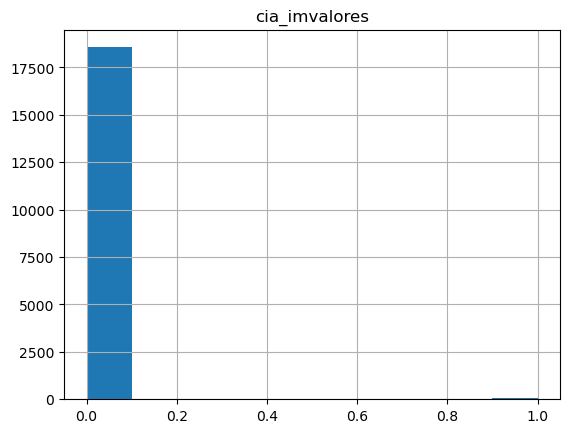

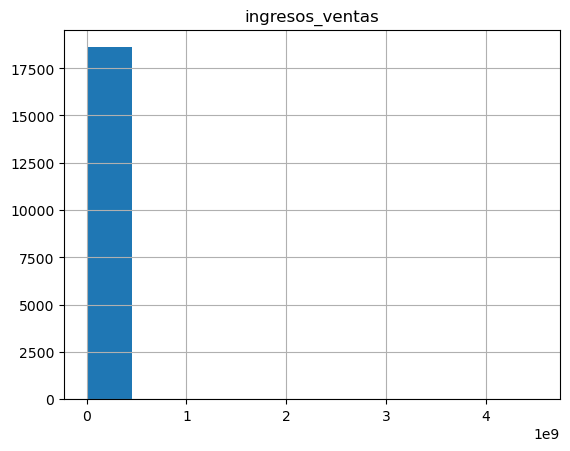

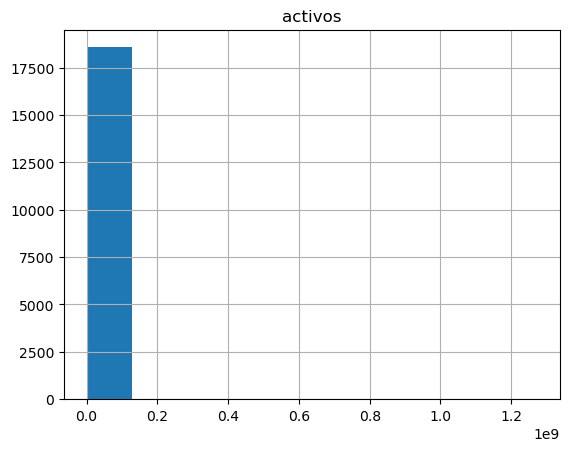

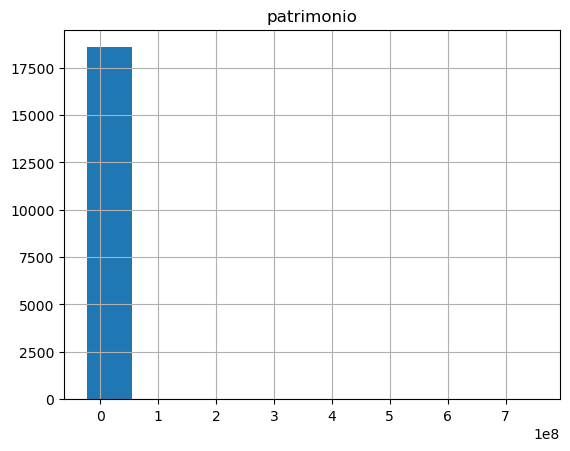

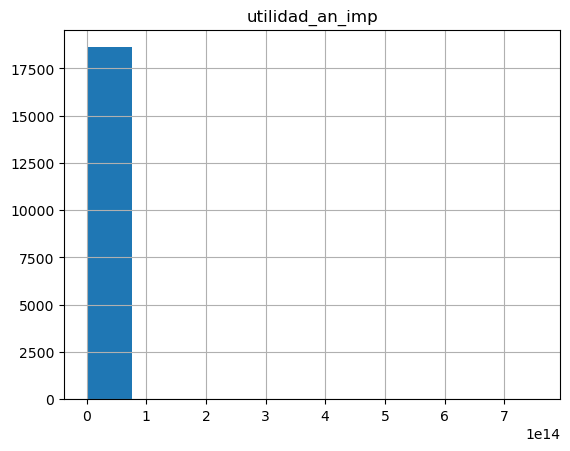

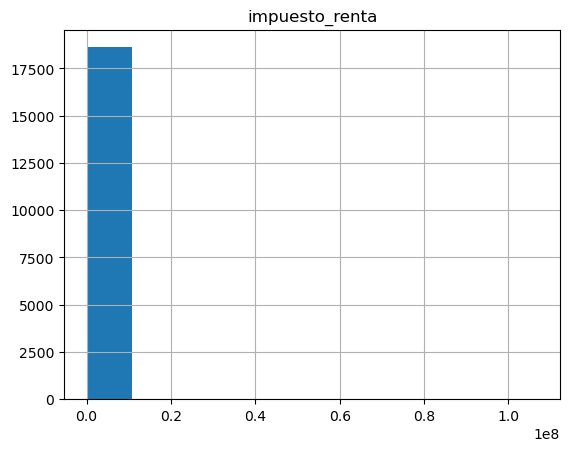

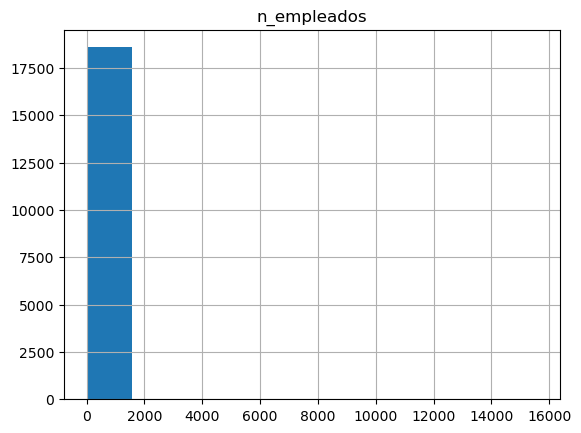

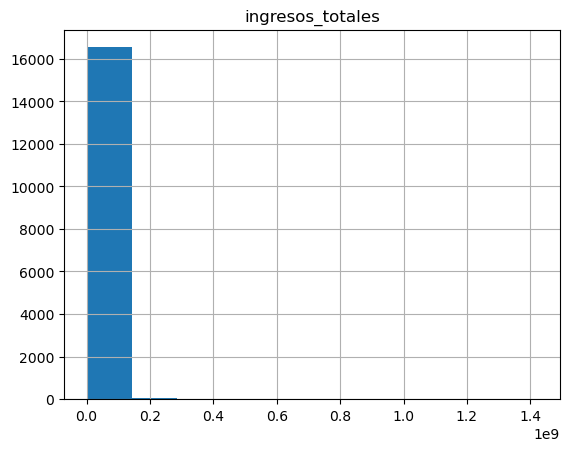

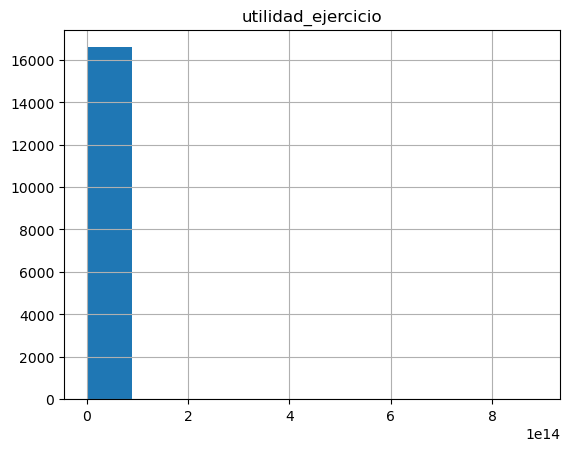

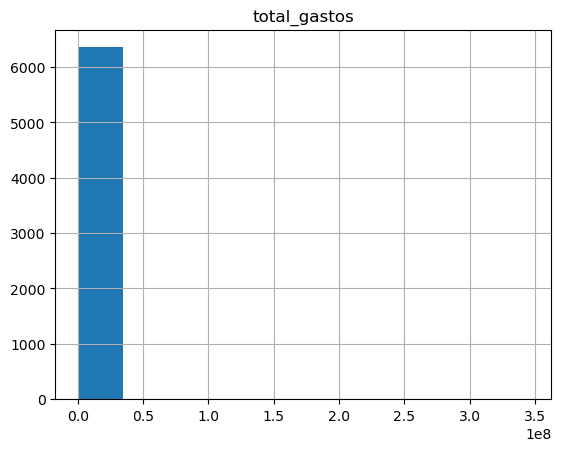

In [35]:
for variable in range(len(variables_cuantitativas)):
    ranking_ciiu_A032.hist(variables_cuantitativas[variable])

Text(0.5, 1.0, 'Ingresos por Ventas')

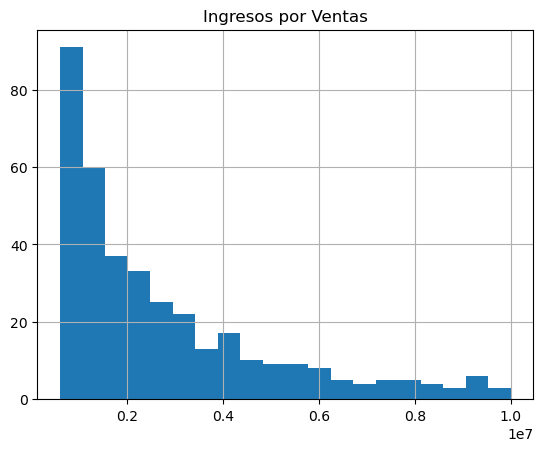

In [36]:
datos_companias["ingresos_ventas"].hist(bins = 20, range = (600000, 10000000))
plt.title('Ingresos por Ventas')

Text(0.5, 1.0, 'Activos')

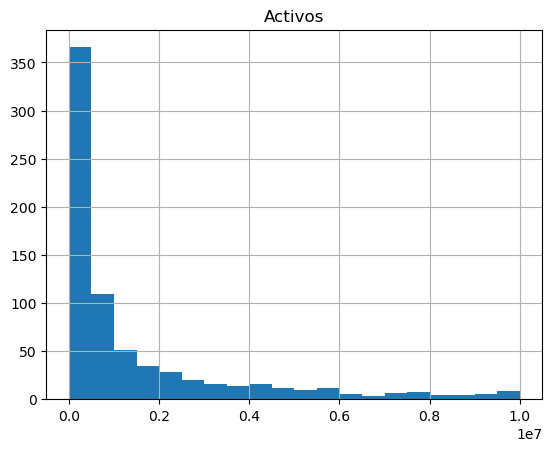

In [37]:
datos_companias["activos"].hist(bins = 20, range = (0, 10000000))
plt.title('Activos')

Text(0.5, 1.0, 'Patrimonio')

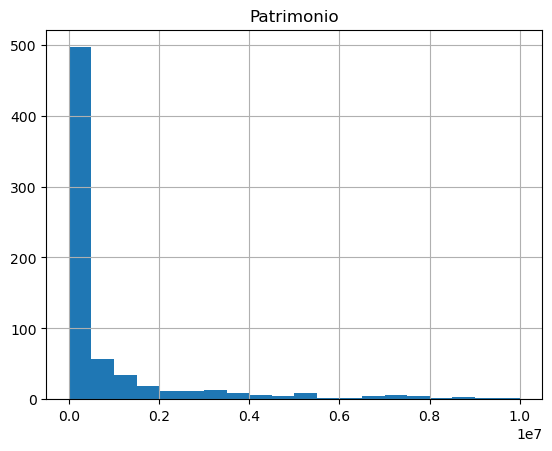

In [38]:
datos_companias["patrimonio"].hist(bins = 20, range = (0, 10000000))
plt.title('Patrimonio')

Text(0.5, 1.0, 'Utilidades antes de impuestos')

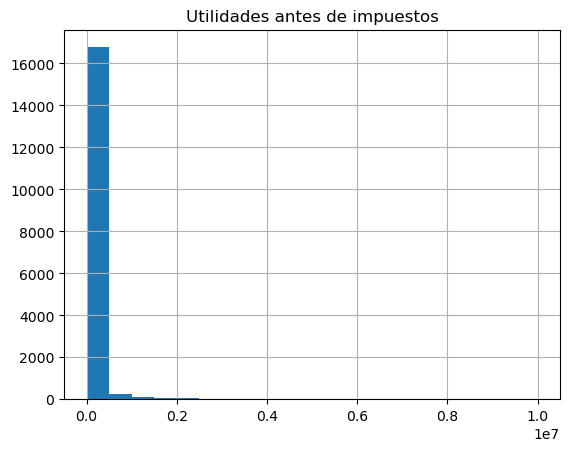

In [39]:
ranking_ciiu_A032["utilidad_an_imp"].hist(bins = 20, range = (0, 10000000))
plt.title('Utilidades antes de impuestos')

Text(0.5, 1.0, 'Impuesto a la Renta')

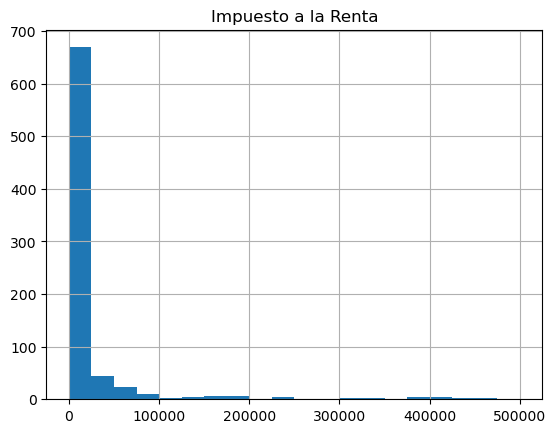

In [40]:
datos_companias["impuesto_renta"].hist(bins = 20, range = (0, 500000))
plt.title('Impuesto a la Renta')

Text(0.5, 1.0, 'Número de Empleados')

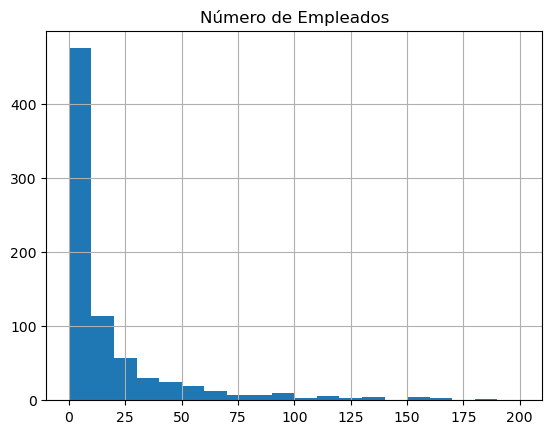

In [41]:
datos_companias["n_empleados"].hist(bins = 20, range = (0,200))
plt.title('Número de Empleados')

Text(0.5, 1.0, 'Ingresos Totales')

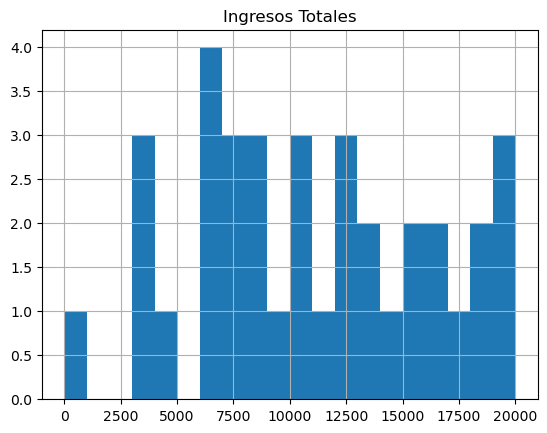

In [42]:
datos_companias["ingresos_totales"].hist(bins = 20, range = (0,20000))
plt.title('Ingresos Totales')

Text(0.5, 1.0, 'Utilidad del Ejercicio')

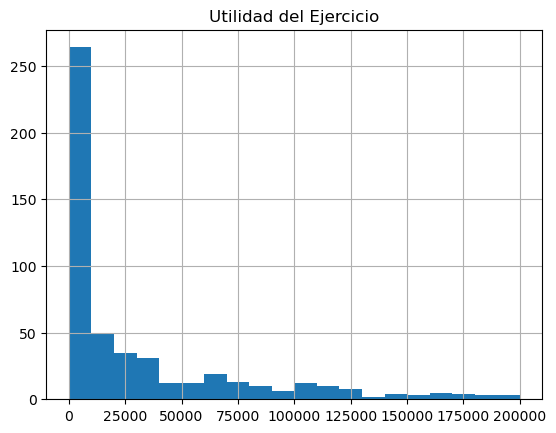

In [43]:
datos_companias["utilidad_ejercicio"].hist(bins = 20, range = (0,200000))
plt.title('Utilidad del Ejercicio')

Text(0.5, 1.0, 'Total de Gastos')

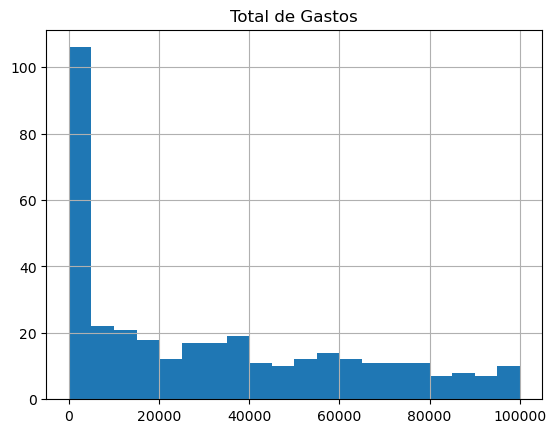

In [44]:
datos_companias["total_gastos"].hist(bins = 20, range = (0,100000))
plt.title('Total de Gastos')

**Diagramas de Caja**

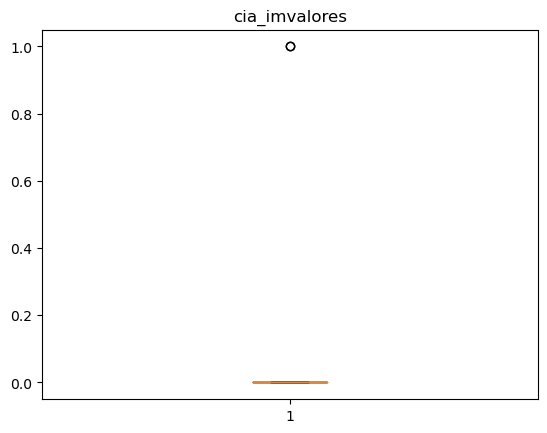

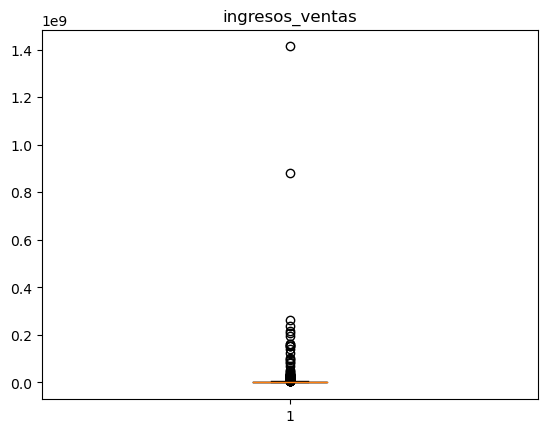

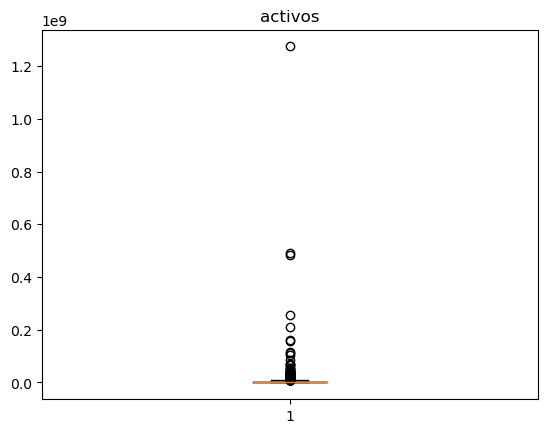

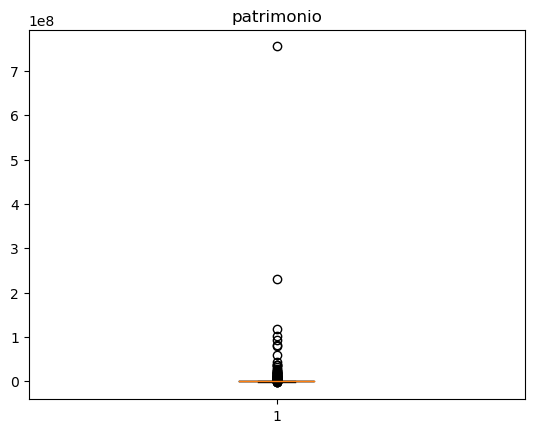

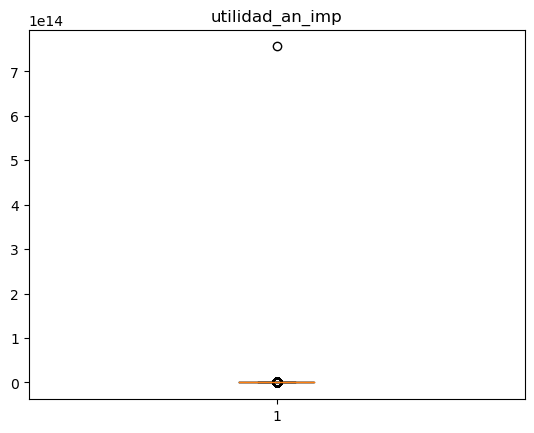

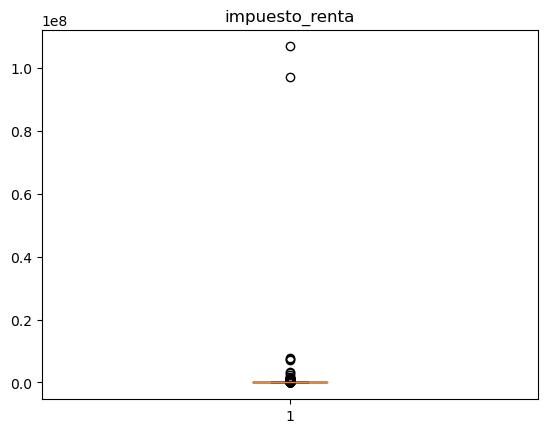

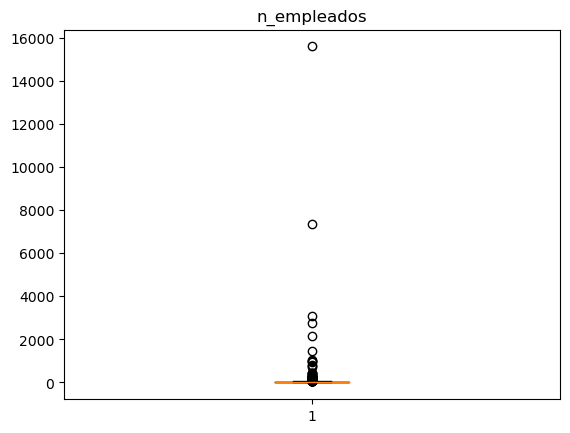

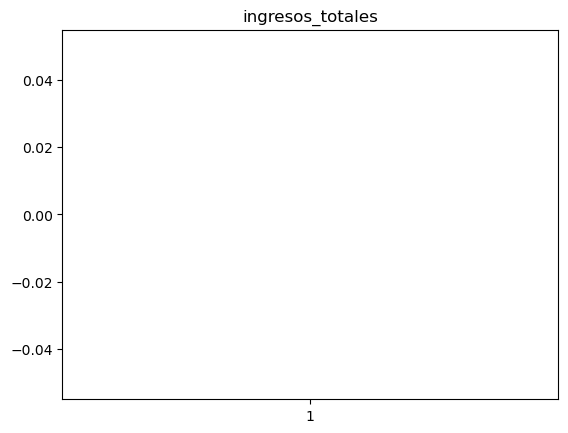

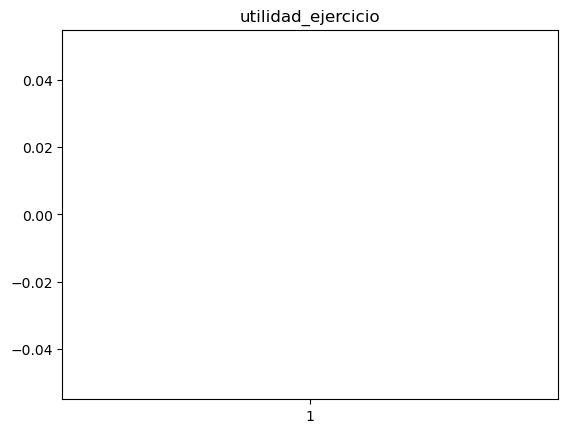

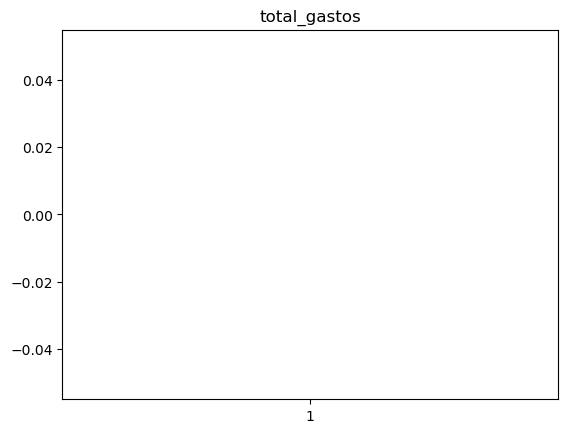

In [45]:
for variable in variables_cuantitativas:
    plt.figure()  
    plt.boxplot(datos_companias[variable])
    plt.title(variable)

Del análisis de los histogramas y digramas de caja, se concluye que existe un gran desbalance en términos económicos entre las empresas. En este caso, los datos anómalos no conviene retirarlos pues correspoden a las empresas más grandes, con quienes será más fácil trabajar. 

Finalmente, es probable que las variables hasta ahora seleccionadas se encuentren correlacionadas. En este caso, se deberían eliminar variables que no aporten información adicional.Se empezará por eliminar las variables que sabemos tienen una correlación directa.

Adicionalmente, se designran con el valor de "0" a las empresas no certificadas. Los datso ausentes de las variables cuantitativas seleccionadas se rellenaran con la mediana.

**Mapa de Correlaciones**

In [46]:
datos_companias.columns


Index(['expediente', 'ruc', 'nombre', 'tipo', 'pro_codigo', 'provincia',
       'Unnamed: 6', 'nombre_compania', 'certificada', 'cia_imvalores',
       'ingresos_ventas', 'activos', 'patrimonio', 'utilidad_an_imp',
       'impuesto_renta', 'n_empleados', 'ingresos_totales',
       'utilidad_ejercicio', 'utilidad_neta', 'cod_segmento',
       'liquidez_corriente', 'prueba_acida', 'end_activo', 'end_patrimonial',
       'end_activo_fijo', 'end_corto_plazo', 'end_largo_plazo',
       'cobertura_interes', 'apalancamiento', 'apalancamiento_financiero',
       'end_patrimonial_ct', 'end_patrimonial_nct', 'apalancamiento_c_l_plazo',
       'rot_cartera', 'rot_activo_fijo', 'rot_ventas', 'per_med_cobranza',
       'per_med_pago', 'impac_gasto_a_v', 'impac_carga_finan',
       'rent_neta_activo', 'margen_bruto', 'margen_operacional',
       'rent_neta_ventas', 'rent_ope_patrimonio', 'rent_ope_activo', 'roe',
       'roa', 'fortaleza_patrimonial', 'gastos_financieros',
       'gastos_admin_venta

In [47]:
datos_companias = datos_companias[['ruc', 'certificada', 'patrimonio', 'utilidad_ejercicio']]
datos_companias['certificada'] = datos_companias['certificada'].fillna(0)
datos_companias[['patrimonio', 'utilidad_ejercicio']] = datos_companias[['patrimonio', 'utilidad_ejercicio']].fillna(datos_companias[['patrimonio', 'utilidad_ejercicio']].median())

In [48]:
datos_companias.corr()

,certificada,patrimonio,utilidad_ejercicio
certificada,1.000000,0.343436,-0.005816
patrimonio,0.343436,1.000000,-0.001324
utilidad_ejercicio,-0.005816,-0.001324,1.000000


In [49]:
datos_companias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 4126 to 278722
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ruc                 818 non-null    object 
 1   certificada         818 non-null    float64
 2   patrimonio          818 non-null    float64
 3   utilidad_ejercicio  818 non-null    float64
dtypes: float64(3), object(1)
memory usage: 32.0+ KB


In [50]:
datos_companias.head(5)

,ruc,certificada,patrimonio,utilidad_ejercicio
4126,0992653817001,0.0,348847.81,50.25
6273,0791742293001,0.0,151022.52,76250.33
6423,0190150011001,0.0,85792.42,7266.60
6875,0990325561001,0.0,2074978.75,7266.60
7185,0190089037001,0.0,4957683.66,438469.85


In [51]:
datos_companias['certificada'].sum()

22.0

In [52]:
datos_companias = datos_companias.reset_index()
datos_companias

,index,ruc,certificada,patrimonio,utilidad_ejercicio
0,4126,0992653817001,0.0,348847.81,50.25
1,6273,0791742293001,0.0,151022.52,76250.33
2,6423,0190150011001,0.0,85792.42,7266.60
3,6875,0990325561001,0.0,2074978.75,7266.60
4,7185,0190089037001,0.0,4957683.66,438469.85
...,...,...,...,...,...
813,275745,0993373417001,0.0,3587.80,2847.80
814,276115,0791840961001,0.0,9565.82,9873.75
815,277186,0791841020001,0.0,12194.38,11394.38
816,277239,0993374134001,0.0,-344111.07,0.00


In [53]:
datos_companias.tail(5)

,index,ruc,certificada,patrimonio,utilidad_ejercicio
813,275745,0993373417001,0.0,3587.80,2847.80
814,276115,0791840961001,0.0,9565.82,9873.75
815,277186,0791841020001,0.0,12194.38,11394.38
816,277239,0993374134001,0.0,-344111.07,0.00
817,278722,2490400918001,0.0,10566.68,9059.85


In [54]:
datos_companias.describe()

,index,certificada,patrimonio,utilidad_ejercicio
count,818.000000,818.000000,8.180000e+02,8.180000e+02
mean,166466.996333,0.026895,3.239878e+06,1.087230e+12
std,73584.538015,0.161875,2.886478e+07,3.109551e+13
min,4126.000000,0.000000,-2.569210e+06,-2.875238e+06
25%,114080.500000,0.000000,1.876888e+04,0.000000e+00
50%,185457.000000,0.000000,1.156874e+05,7.266600e+03
75%,226249.500000,0.000000,7.573926e+05,6.714938e+04
max,278722.000000,1.000000,7.549777e+08,8.893534e+14


# 2. Modelación

In [55]:
# Importa librerías

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import math

from IPython.display import display

## 2.1 Escalado de Datos

In [56]:
# Escalado de datos

feature_names = ['patrimonio', 'utilidad_ejercicio']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(datos_companias[feature_names].to_numpy())

datos_companias_escalado = datos_companias.copy()
datos_companias_escalado.loc[:, feature_names] = transformer_mas.transform(datos_companias[feature_names].to_numpy())

In [57]:
datos_companias_escalado.sample(5)

,index,ruc,certificada,patrimonio,utilidad_ejercicio
406,185183,0992921838001,0.0,0.000001,1.330742e-12
539,216645,0992991143001,0.0,0.000055,7.164973e-11
130,85638,0791746175001,0.0,0.000568,0.000000e+00
195,111272,0992268417001,0.0,0.000141,1.236050e-10
465,201668,0791822769001,0.0,-0.000120,-8.439945e-11


In [58]:
# Función que devuelve los vecinos más cercanos 

def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    
    :param k: el número de vecinos cercanos a calcular
    :param n: número de usuario para el que se buscan los vecinos más cercanos 
    """
    
    # Crea la instancia del algoritmo de clasificación
    # Define los parámetros del algoritmo de clasificación en donde:
        # "algorithm" es el algoritmo usado  para calcular los vecinos cercanos (fijado en "auto" para que la función escoja el, mejor algoritmo en base al ajuste de los datos usando el método "fit")
        # "metric" corresponde a la métrica de distancia
        # Ajusta el algoritmo a los datos de entrada provistos usando el método fit
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto', metric=metric).fit(df) 
                                                                                      
    # Se aplica el método "kneighbors" al modelo para obtener los vecinos (en este caso clientes) más cercanos  
    # Los parámetros de método son:
        #"X", en este caso "[df.iloc[n]]" que seleciona el punto de consulta (en este caso cliente)                                                                                             
        #"return_distance=True" se establece que método devuelva las distancias que determinaron la selección de los vecinos                                                                                        
    # El método devuelve dos resultados:                                                                                          
        #"neigh_dist" en este caso "nbrs_distances", que representa una matriz con las distancias del punto de consulta (cliente) a los vecinos cercanos                                                                                 
        #"neigh_ind" en este caso "nbrs_indices", que representa los índices del "dataframe" de los vecinos cercanos al punto de consulta (cliente)                                                                                                                                                             
                                                                                        
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n]], k, return_distance=True) 
    
    
    #Concatena los resultados de método "kneighbors" para devolver un "dataframe" de respuesta
    #Extrae todos los datos del vecino cercano seleccionado (en base al método "kneighbors") de acuerdo al valor de su índice. Estos datos se extraen del "dataframe" original "df"
    #Añade la columna de distancia al "dataframe" de respuesta, suando los siguientes parámetros: 
        #índice del vecino cercano (cliente) "index=nbrs_indices[0]"
        #matriz transpuesta de los resultados de las distancias de los vecinos cercanos
        #nombre de la nueva colunma "columns=['distance']"
        
    df_res = pd.concat([ 
        df.iloc[nbrs_indices[0]],   
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance']) 
        ], axis=1)                                                                      
                                                                                                                                                                                
    return df_res

In [59]:
# Registros de compañías certificadas
datos_companias_certificadas = datos_companias[datos_companias["certificada"] == 1] 
datos_companias_certificadas 

,index,ruc,certificada,patrimonio,utilidad_ejercicio
5,7294,0990171092001,1.0,8.238260e+06,1.812816e+06
17,16556,0990553963001,1.0,4.471006e+07,4.014589e+06
19,16616,0990555575001,1.0,7.038264e+06,2.461776e+06
26,20430,0991257721001,1.0,7.549777e+08,1.465574e+08
27,22315,0990576459001,1.0,1.033155e+08,0.000000e+00
35,26135,0790050487001,1.0,7.696617e+06,-1.421508e+05
50,38778,0990666253001,1.0,2.093737e+05,1.808737e+05
54,38941,0990666407001,1.0,2.361815e+07,2.533452e+06
57,39469,0990608504001,1.0,2.303004e+08,8.955445e+07
60,39606,0990621705001,1.0,1.883837e+07,5.052222e+06


In [60]:
# Datos escalados con distancia "Euclidiana"
get_knn(datos_companias_escalado, 5, 5, "euclidean")

,index,ruc,certificada,patrimonio,utilidad_ejercicio,distance
5,7294,0990171092001,1.0,0.010912,2.038353e-09,0.000000e+00
28,22562,0990071969001,0.0,0.155554,2.297520e-09,9.912300e+07
104,59911,0990270899001,0.0,0.000076,8.170656e-12,9.980701e+07
24,19668,0990277923001,0.0,0.000137,8.170656e-12,1.068310e+08
105,60090,0990298947001,0.0,-0.000010,8.170656e-12,1.278550e+08


In [61]:
# Datos escalados con distancia "Euclidiana"
get_knn(datos_companias_escalado, 17, 5, "euclidean")

,index,ruc,certificada,patrimonio,utilidad_ejercicio,distance
17,16556,0990553963001,1.0,0.059220,4.514054e-09,0.000000e+00
16,16462,0990552401001,0.0,0.000813,8.170656e-12,1.562000e+06
19,16616,0990555575001,1.0,0.009322,2.768051e-09,1.612000e+06
18,16582,0990555907001,0.0,0.017977,2.846836e-10,1.944000e+06
15,16411,0990549591001,0.0,0.015503,7.208293e-09,4.372000e+06


In [62]:
def dataframe_de_resultados(df1, df2, func, param1, param2):

    resultados = []
    for index in df1.index:
        resultado = func(df2, index, param1, param2) 
        resultados.append(resultado)
    
    # Concatena los resultados en un nuevo DataFrame
    nuevo_df = pd.concat(resultados)
    
    # Elimina los duplicados
    nuevo_df = nuevo_df.drop_duplicates(subset='ruc', keep='first')
    
    # Elimina los datos de las empresas certificadas
    
    nuevo_df = nuevo_df[nuevo_df.certificada == 0]
    
    # Devuelve los ceros a la columna de RUC
    
    nuevo_df['ruc'] = nuevo_df['ruc'].map(str)
    #nuevo_df['ruc'] = nuevo_df['ruc'].apply(lambda x: '0' + x if x[0] != '1' else x)
    
    # Realiza un "join" para obtener los datos completos de las empresas
    nuevo_df = pd.merge(compania,nuevo_df, on = "ruc", how='inner')
    nuevo_df = nuevo_df.drop(["Unnamed: 6", "index", "certificada", "expediente", "distance", "pro_codigo"], axis=1)
    
    return nuevo_df


In [63]:
resultados = dataframe_de_resultados(datos_companias_certificadas, datos_companias_escalado, get_knn, 5, "euclidean")
resultados

,ruc,nombre,tipo,provincia,patrimonio,utilidad_ejercicio
0,0790048741001,INDUSTRIAS Y CULTIVOS EL CAMARON SA ICCSA,ANÓNIMA ...,GUAYAS ...,0.014637,-8.993404e-10
1,0990549591001,CAMARONERA AGROMARINA SA,ANÓNIMA ...,GUAYAS ...,0.015503,7.208293e-09
2,0990552401001,MARINES CA,ANÓNIMA ...,GUAYAS ...,0.000813,8.170656e-12
3,0990555907001,GRANJAS MARINAS DOBLE A (GRAMADA) S.A.,ANÓNIMA ...,GUAYAS ...,0.017977,2.846836e-10
4,0790045971001,PRODUCTOS DE EL ORO CA PRODELORO CA,ANÓNIMA ...,GUAYAS ...,0.000023,8.170656e-12
...,...,...,...,...,...,...
65,0993019526001,AQUADEX CIA.LTDA.,RESPONSABILIDAD LIMITADA ...,MANABI ...,0.000005,5.031622e-12
66,0993025526001,DICARJO S.A.,ANÓNIMA ...,GUAYAS ...,0.001747,0.000000e+00
67,0993188816001,I&V BIO S.A.,ANÓNIMA ...,GUAYAS ...,0.003696,2.296980e-09
68,0993192155001,SKRETTING ARC ECUADOR S.A.,ANÓNIMA ...,GUAYAS ...,0.009465,6.213165e-10


In [64]:
resultados.to_csv('resultados.csv', index=False)  